In [2]:
import numpy as np
import pandas as pd


In [ ]:
with open('test.tok.en','r') as f:
    train_data_en = np.array(f.read().splitlines())
    
with open('test.tok.zh','r') as f:
    train_data_zh = np.array(f.read().splitlines())


In [ ]:
def prepare_data(df):
    df['en_sent'] = df['en_sent'].str.split()
    df['zh_sent'] = df['zh_sent'].str.split()
    return df

In [ ]:
train_data = pd.DataFrame({'en_sent':train_data_en,'zh_sent':train_data_zh})

In [ ]:
train_data = prepare_data(train_data)

In [ ]:
train_data['en_sent'].str.len().quantile(0.9)

In [ ]:
test_data = pd.DataFrame({'en_sent':train_data_en,'zh_sent':train_data_zh})

In [ ]:
test_data['zh_sent'] = test_data['zh_sent'].str.split()

In [ ]:
test_data['len_source'] = test_data['zh_sent'].apply(lambda x: len(x))

In [ ]:
test_data['zh_ids'] = test_data['zh_sent'].apply(lambda x: [(x[i],i) for i in range(len(x))])

In [ ]:
test_data

In [ ]:
with open('../data/vi-en/test.tok.en','r') as f:
    train_data_en = np.array(f.read().splitlines())
    
with open('../data/vi-en/test.tok.vi','r') as f:
    train_data_vi = np.array(f.read().splitlines())


In [ ]:
test_data = pd.DataFrame({'en_sent':train_data_en,'vi_sent':train_data_vi})

In [ ]:
(test_data['vi_sent'].str.strip() == '').sum()

In [3]:
import os
import pickle

In [4]:
def load_object(filepath):
    '''
    This is a defensive way to write pickle.load, allowing for very large files on all platforms
    '''
    max_bytes = 2**31 - 1
    try:
        input_size = os.path.getsize(filepath)
        bytes_in = bytearray(0)
        with open(filepath, 'rb') as f:
            for _ in range(0, input_size, max_bytes):
                bytes_in += f.read(max_bytes)
        object = pickle.loads(bytes_in)
    except Exception as error:
        print(error)
        return None
    return object

In [ ]:
token2id = load_object('../data/vi-en/token2id.50000.vi.p')

In [ ]:
len(token2id)

In [ ]:
token2id

In [ ]:
token2id = load_object('../data/vi-en/token2id.50000.en.p')

In [ ]:
len(token2id)

In [ ]:
np.random.choice(range(100),10,replace=False)

In [ ]:
temp = []

In [ ]:
if temp is not None:
    print('hey')

In [ ]:
all_weights_mats = load_object('../data/vi-en/all_weights_selected_sentences.vi')
selected_output_sents = load_object('../data/vi-en/selected_output_sentences.vi')

In [ ]:
selected_source_sents = load_object('../data/vi-en/selected_source_sentences.vi')

In [ ]:
len(all_weights_mats)

In [ ]:
all_weights_mats[0] = np.array(all_weights_mats[0])

In [ ]:
len(all_weights_mats[0])

In [ ]:
all_weights_mats[0].shape

In [ ]:
all_weights_mats[3].shape

In [ ]:
len(all_weights_mats)

In [ ]:
all_weights_mats = load_object('../data/vi-en/all_weights_selected_sentences.vi')


In [ ]:
len(all_weights_mats)

In [5]:
all_weights_selected_sentences = load_object('../data/vi-en/all_weights_selected_sentences.vi')

In [9]:
selected_source_sents = load_object('../data/vi-en/selected_source_sentences.vi')
selected_output_sents = load_object('../data/vi-en/selected_output_sentences.vi')

In [6]:
len(all_weights_selected_sentences)

10

In [7]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

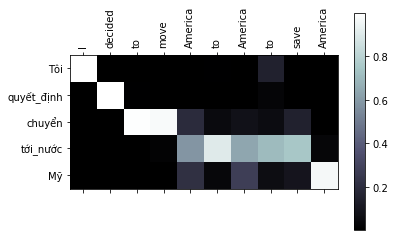

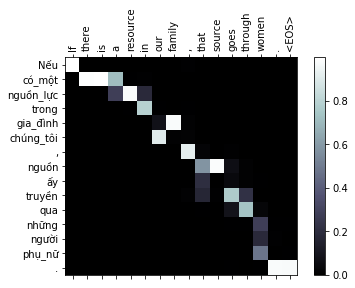

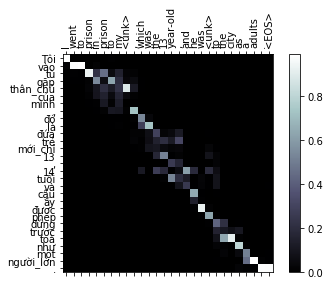

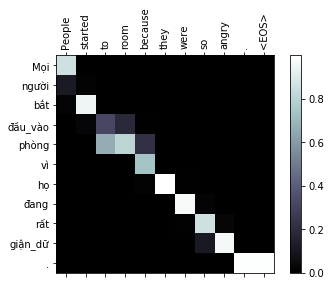

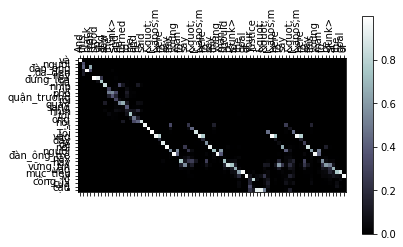

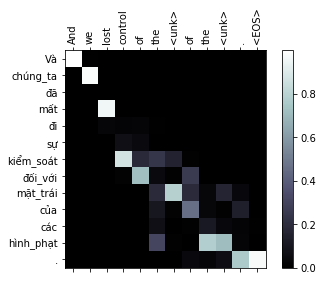

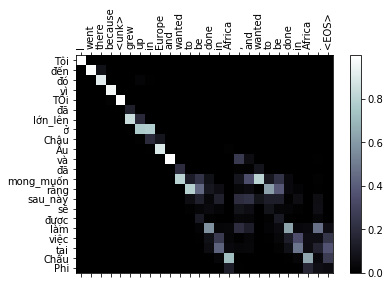

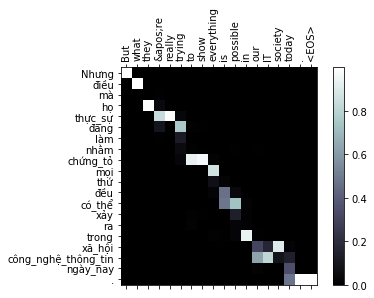

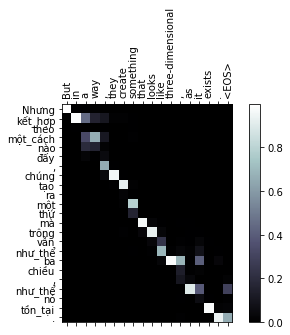

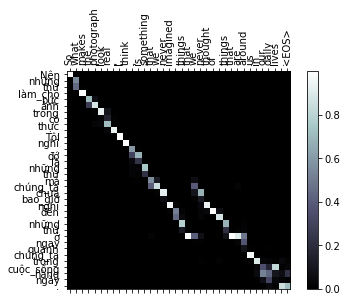

In [24]:
for i in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(np.array(all_weights_selected_sentences[i]).swapaxes(0,1), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + selected_output_sents[i].split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + selected_source_sents[i].split(' ') + ['<EOS>'])

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [26]:
selected_output_sents[1]

'If there is a resource in our family , that source goes through women .'

In [25]:
selected_source_sents[1]

'Nếu có_một nguồn_lực trong gia_đình chúng_tôi , nguồn ấy truyền qua những người phụ_nữ .'

In [13]:
len(all_weights_selected_sentences[0])

10

In [15]:
all_weights_selected_sentences[0][0].shape

(5,)

In [20]:
np.array(all_weights_selected_sentences[0]).shape

(10, 5)

In [22]:
good_sentence = 'Nếu có_một nguồn_lực trong gia_đình chúng_tôi , nguồn ấy truyền qua những người phụ_nữ .'


'Tôi quyết_định chuyển tới_nước Mỹ'

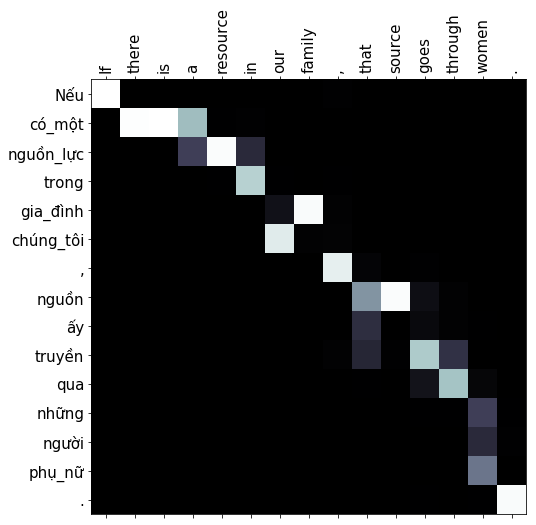

In [33]:
fig = plt.figure(figsize=(10,8))
plt.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(111)
cax = ax.matshow(np.array(all_weights_selected_sentences[1][:-1]).swapaxes(0,1), cmap='bone')
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + selected_output_sents[1].split(' '), rotation=90)
ax.set_yticklabels([''] + selected_source_sents[1].split(' '))

# Show label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
im=ax.images
cb=im[-1].colorbar
cb.remove()
plt.savefig('../plots/attn_plot_vi.eps',dpi=1000)
plt.show()

In [80]:
all_weights_selected_sentences = load_object('../data/vi-en/all_weights_selected_sentences.vi')

selected_source_sents = load_object('../data/vi-en/selected_source_sentences.vi')
selected_output_sents = load_object('../data/vi-en/selected_output_sentences.vi')

In [61]:
from matplotlib.font_manager import FontProperties
ChineseFont1 = FontProperties(fname = '../data/SimHei.ttf',size=15)
#fontP.set_family('SimHei')

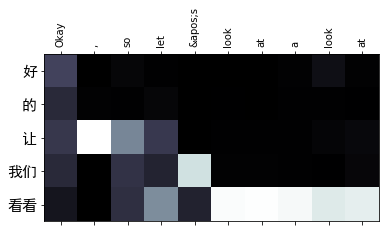

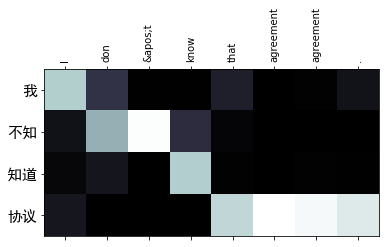

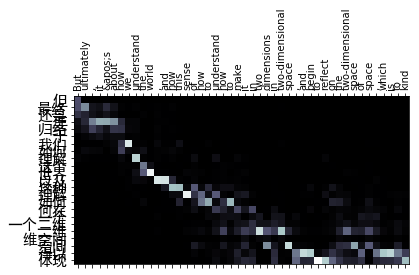

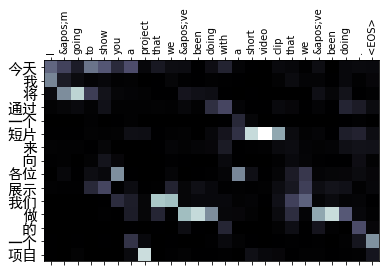

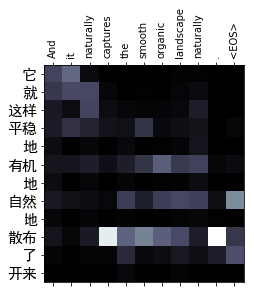

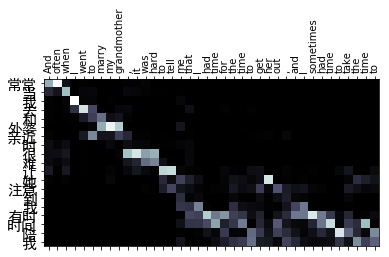

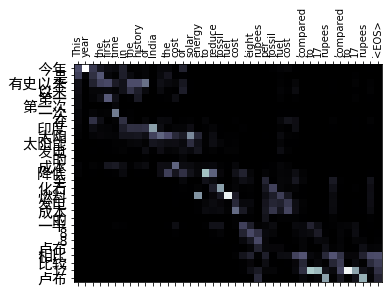

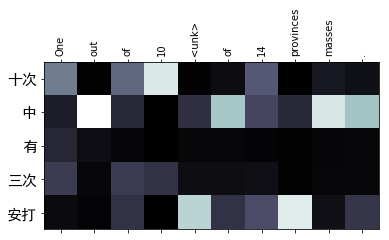

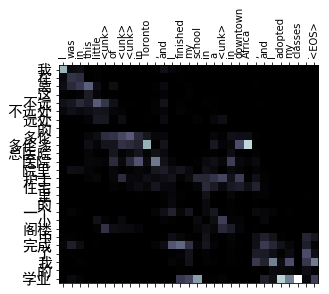

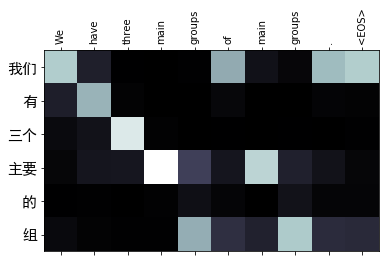

In [62]:
for i in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(np.array(all_weights_selected_sentences[i]).swapaxes(0,1), cmap='bone')
    #fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + selected_output_sents[i].split() +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + selected_source_sents[i].split() + ['<EOS>'],fontproperties = ChineseFont1)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [42]:
fontProperties = {'family':'sans-serif','sans-serif':['Helvetica'],
    'weight' : 'normal', 'size' : 10}

In [54]:
selected_source_sents[i].split(' ')

['', '', '我们', '有', '三个', '主要', '的', '组', '', '', '']

In [57]:
selected_source_sents[9].split()

['我们', '有', '三个', '主要', '的', '组']

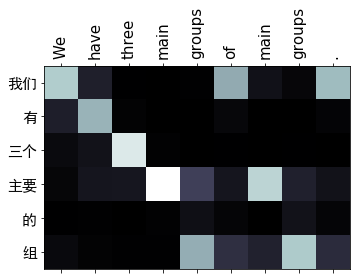

In [68]:
fig = plt.figure()
plt.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(111)
cax = ax.matshow(np.array(all_weights_selected_sentences[9][:-1]).swapaxes(0,1), cmap='bone')
#fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + selected_output_sents[9].split(), rotation=90)
ax.set_yticklabels([''] + selected_source_sents[9].split(),fontproperties = ChineseFont1)

# Show label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#im=ax.images
#cb=im[-1].colorbar
#cb.remove()
plt.tight_layout()
plt.savefig('../plots/attn_plot_zh.png',dpi=300)
plt.show()

In [70]:
np.random.random()

0.23639551091294198

In [79]:
np.random.random()

0.5880543357248529

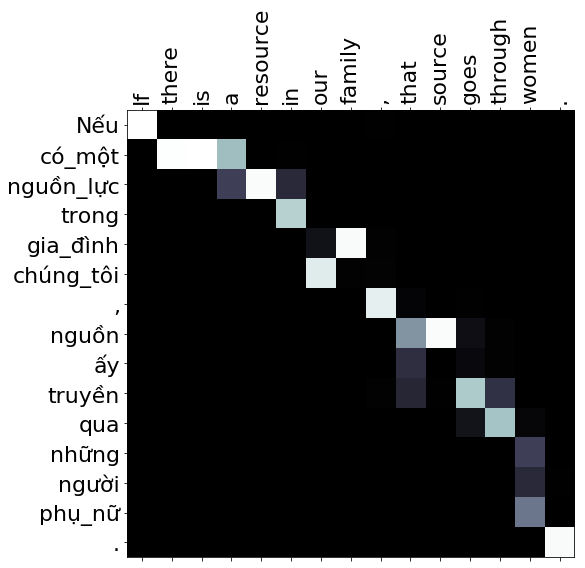

In [84]:
fig = plt.figure(figsize=(10,8))
plt.tick_params(axis='both', which='major', labelsize=22)
ax = fig.add_subplot(111)
cax = ax.matshow(np.array(all_weights_selected_sentences[1][:-1]).swapaxes(0,1), cmap='bone')
#fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + selected_output_sents[1].split(), rotation=90)
ax.set_yticklabels([''] + selected_source_sents[1].split())

# Show label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#im=ax.images
#cb=im[-1].colorbar
#cb.remove()
plt.tight_layout()
plt.savefig('../plots/attn_plot_vi.png',dpi=300)
plt.show()

In [243]:
all_target_sents_zh = load_object('../data/zh-en/all_target_sentences.zh')
all_output_sents_zh = load_object('../data/zh-en/all_output_sentences.zh')
all_target_sents_vi = load_object('../data/vi-en/all_target_sentences.vi')
all_output_sents_vi = load_object('../data/vi-en/all_output_sentences.vi')

In [229]:
from sacrebleu import corpus_bleu

In [230]:
corpus_bleu(all_output_sents,[all_target_sents],lowercase=True).score

13.882639069870079

In [244]:
all_target_sents_vi = np.array(all_target_sents_vi)
all_output_sents_vi = np.array(all_output_sents_vi)
all_target_sents_zh = np.array(all_target_sents_zh)
all_output_sents_zh = np.array(all_output_sents_zh)

In [245]:
bleu_data_vi = pd.DataFrame({'target_sent':all_target_sents_vi,'output_sent':all_output_sents_vi})

bleu_data_vi['target_len'] = bleu_data_vi['target_sent'].str.split().str.len()

bleu_data_vi['target_len'].describe()

count    1553.000000
mean       18.018674
std        11.234223
min         2.000000
25%        10.000000
50%        15.000000
75%        23.000000
max        93.000000
Name: target_len, dtype: float64

In [246]:
bleu_data_zh = pd.DataFrame({'target_sent':all_target_sents_zh,'output_sent':all_output_sents_zh})

bleu_data_zh['target_len'] = bleu_data_zh['target_sent'].str.split().str.len()

bleu_data_zh['target_len'].describe()

count    1397.000000
mean       18.024338
std        11.459195
min         2.000000
25%        10.000000
50%        15.000000
75%        23.000000
max        93.000000
Name: target_len, dtype: float64

In [247]:
bins = np.arange(0,101,10)

In [248]:
bins = [0,10,15,20,25,28,30,40,50,100]

In [249]:
labels = range(len(bins)-1)

In [250]:
len(bins)

10

In [251]:
bleu_data_vi['bins'] = pd.cut(bleu_data_vi['target_len'],bins=bins,labels=labels)
bleu_data_zh['bins'] = pd.cut(bleu_data_zh['target_len'],bins=bins,labels=labels)

In [258]:
bins_bleu_score_vi = np.zeros(len(labels))
for i in range(len(labels)):
    binned_data = bleu_data_vi[bleu_data_vi['bins'] == i]
    bins_bleu_score_vi[i] = corpus_bleu(binned_data['output_sent'].tolist(),[binned_data['target_sent'].tolist()],lowercase=True).score

bins_bleu_score_zh = np.zeros(len(labels))
for i in range(len(labels)):
    binned_data = bleu_data_zh[bleu_data_zh['bins'] == i]
    bins_bleu_score_zh[i] = corpus_bleu(binned_data['output_sent'].tolist(),[binned_data['target_sent'].tolist()],lowercase=True).score
    

In [259]:
bins_bleu_score_vi

array([23.88659356, 23.47438025, 23.43011565, 22.00916651, 22.10299017,
       22.40458556, 22.037606  , 20.97538664, 18.18214917])

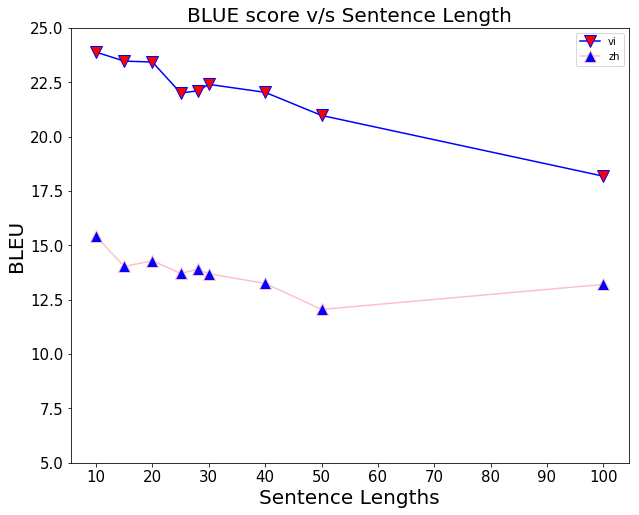

In [262]:
plt.figure(figsize = (10,8))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('BLUE score v/s Sentence Length',fontsize=20)
plt.plot([10,15,20,25,28,30,40,50,100], bins_bleu_score_vi, color='blue', marker = 'v', markerfacecolor= 'red', markersize = 12,label='vi')
plt.plot([10,15,20,25,28,30,40,50,100], bins_bleu_score_zh, color='pink', marker = '^', markerfacecolor= 'blue', markersize = 12,label='zh')

plt.xticks(range(10,101,10))
plt.ylim(5,25)
plt.xlabel('Sentence Lengths',fontsize=20)
plt.ylabel('BLEU',fontsize=20)
plt.legend()
plt.savefig('../plots/bleu_sents_vi.png',dpi=600)
plt.show()

In [118]:
bleu_data[bleu_data['bins'] == 4]['target_sent'].tolist()

['I wanted to retreat to the <unk> and comfort of life in an <unk> suburb -- a grandmother , a mother and two daughters ending each day as they had for almost 20 years , telling one another the story of their day and falling asleep , the three of us still in the same bed .',
 'And these older people come up to me now and they say , &quot; Mr. <unk> , you give talks , you make speeches , you tell people to stop saying we &apos;re dealing with terrorism for the first time in our nation &apos;s history after 9 / 11 . &quot;',
 'And finally , I believe that , despite the fact that it is so dramatic and so beautiful and so inspiring and so stimulating , we will ultimately not be judged by our technology , we won &apos;t be judged by our design , we won &apos;t be judged by our intellect and reason .',
 'But in fact , what we &apos;re seeing more and more is that if you are willing to cut , get rid of those <unk> redundant options , well there &apos;s an increase in sales , there &apos;s a l

In [168]:
bleu_data['bins'].value_counts()

0    429
1    372
2    250
3    187
6    126
4     80
5     42
7     38
8     29
Name: bins, dtype: int64

In [121]:
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

(array([ 13.,  66., 125., 145., 155.,  68., 152., 131.,  93., 103.,  82.,
         43.,  62.,  57.,  50.,  36.,  22.,  31.,  17.,  22.,  13.,  12.,
          2.,   9.,   5.,   8.,   5.,   3.,   4.,   2.,   4.,   4.,   0.,
          1.,   1.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 2.  ,  3.82,  5.64,  7.46,  9.28, 11.1 , 12.92, 14.74, 16.56,
        18.38, 20.2 , 22.02, 23.84, 25.66, 27.48, 29.3 , 31.12, 32.94,
        34.76, 36.58, 38.4 , 40.22, 42.04, 43.86, 45.68, 47.5 , 49.32,
        51.14, 52.96, 54.78, 56.6 , 58.42, 60.24, 62.06, 63.88, 65.7 ,
        67.52, 69.34, 71.16, 72.98, 74.8 , 76.62, 78.44, 80.26, 82.08,
        83.9 , 85.72, 87.54, 89.36, 91.18, 93.  ]),
 <a list of 50 Patch objects>)

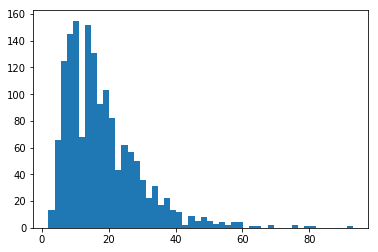

In [122]:
plt.hist(bleu_data['target_len'],bins=50)

In [263]:
selected_source_sents_vi = load_object('../data/vi-en/selected_source_sentences.vi')
selected_output_sents_vi = load_object('../data/vi-en/selected_output_sentences.vi')
selected_target_sents_vi = load_object('../data/vi-en/selected_target_sentences.vi')

In [264]:
selected_data_vi = pd.DataFrame({'source_sent':selected_source_sents_vi,'target_sent':selected_target_sents_vi,'output_sent':selected_output_sents_vi})


In [266]:
pd.options.display.max_colwidth = -1

In [267]:
selected_data_vi

,source_sent,target_sent,output_sent
0,Tôi quyết_định chuyển tới_nước Mỹ,I made the decision to move to the U.S.,I decided to move America to America to save America
1,"Nếu có_một nguồn_lực trong gia_đình chúng_tôi , nguồn ấy truyền qua những người phụ_nữ .","If there is a <unk> in our family , it runs through the women .","If there is a resource in our family , that source goes through women ."
2,"Tôi vào tù gặp thân_chủ của mình , đó là đứa trẻ mới_chỉ 13 , 14 tuổi và cậu ấy được phép đứng trước toà như một người_lớn .","And I go to the jail and I see my client who &apos;s 13 and 14 , and he &apos;s been certified to stand trial as an adult .","I went to prison in prison to my <unk> , which was the 13 year-old , and he was <unk> to the city as a adults ."
3,Mọi người bắt đầu_vào phòng vì họ đang rất giận_dữ .,And people started coming in because they were just outraged .,People started to room because they were so angry .
4,"và người đàn_ông da_đen này đứng_lên và nhìn vị phó quận_trưởng rồi quay sang nhìn tôi ông nói : "" Tôi vào đây để nói người đàn_ông_trẻ này hãy vững_tin vào mục_tiêu vì công_lý của cậu ""","And this older black man stood up and he looked at that deputy and he looked at me and he said , &quot; I came into this <unk> to tell this young man , keep your eyes on the prize , hold on . &quot;","And this black man stood up and saw the <unk> and he turned to me and he said , &quot; I &apos;m here to say this young man to say , &quot; I &apos;m here to say this young man should be <unk> to the goal of your justice , &quot; &quot; I &apos;m here to say , &quot; I &apos;m here to say this young man to be <unk> at the goal of"
5,Và chúng_ta đã mất đi sự kiểm_soát đối_với mặt_trái của các hình_phạt .,And we got carried away with the rhetoric of punishment .,And we lost control of the <unk> of the <unk> .
6,Tôi đến đó vì TÔi đã lớn_lên ở Châu Âu và đã mong_muốn rằng sau_này sẽ được làm việc tại Châu Phi,I was there because I grew up in Europe and I wanted later to work in Africa .,"I went there because <unk> grew up in Europe and wanted to be done in Africa , and wanted to be done in Africa ."
7,Nhưng điều mà họ thực_sự đang làm nhằm chứng_tỏ mọi thứ đều có_thể xảy ra trong xã_hội công_nghệ_thông_tin ngày_nay .,But really what they &apos;re doing is they &apos;re showing what &apos;s possible with technology today .,But what they &apos;re really trying to show everything is possible in our IT society today .
8,"Nhưng kết_hợp theo một_cách nào đấy , chúng tạo ra một thứ mà trông vẫn như_thể ba chiều , như_thể nó tồn_tại .","But combined in a certain way , they can create something that still looks three-dimensional , like it could exist .","But in a way , they create something that looks like three-dimensional , as it exists ."
9,"Nên những thứ làm_cho bức ảnh trông có thực , Tôi nghĩ , đó là những thứ mà chúng_ta chưa bao_giờ nghĩ đến , những thứ ở ngay quanh chúng_ta trong cuộc_sống hàng ngày .","So the things that make a photograph look realistic , I think it &apos;s the things that we don &apos;t even think about , the things all around us in our daily lives .","So what makes the photograph look real , I think , is something that we never imagined , things that we never thought of , things that are around us in our daily lives ."


In [268]:
np.random.rand()

0.3578240412010103

In [273]:
selected_source_sents_zh = load_object('../data/zh-en/selected_source_sentences.zh')
selected_output_sents_zh = load_object('../data/zh-en/selected_output_sentences.zh')
selected_target_sents_zh = load_object('../data/zh-en/selected_target_sentences.zh')

In [274]:
selected_data_zh = pd.DataFrame({'source_sent':selected_source_sents_zh,'target_sent':selected_target_sents_zh,'output_sent':selected_output_sents_zh})


In [275]:
selected_data_zh

,source_sent,target_sent,output_sent
0,我 生活 在 一个 平行 的 世界,I lived in parallel worlds .,"I live in parallel , in parallel ."
1,由 母亲 独自 自养 养大,Her mother raised her alone .,<unk> by mother alone .
2,所以 以其 其实 所有 的 工具 都 在 那 唯一 限制 我们 的 是 我们 的 想象 想象力,"So all the tools are out there , and the only thing that limits us is our imagination .","So , the tools are all over the place , and the only limitations to us is our imagination ."
3,所以 神经 神经系 神经系统 系统 生物 组建 这种 特殊 结构 的 事实 极大 大地 加速 了 进化 的 进程,"So that nervous system , the fact that they built these special information structures , tremendously sped up the whole process of evolution .",So the <unk> of this particular structure has this huge explosion of fact accelerating the evolution of evolution .
4,实际 实际上 我 所 做 的 思考 机器 的 设计 设计师 们 做 的 我们 认为 是 为 某种 某种程度 程度 的 资讯 抽取 然后 把 它 传给 机器 而 机器 把 它 运用 用到 超出 我们 所能 做 的 范围 而且 比 我们 从前 前所 做 的 更深 深远 更快,"Instead , what I do and what the designers at Thinking Machines do is we think at some level of abstraction and then we hand it to the machine and the machine takes it beyond what we could ever do , much farther and faster than we could ever do .","In fact , what I &apos;m doing is thinking about what the designers are doing , we think it &apos;s a kind of information , and then we &apos;re going to use it to take it out of machine and use it to scale it out of the scale that we can do , and much more importantly than we could ever do before , faster than we could have done ."
5,所以 我 在 电脑 上 用 几分 几分钟 分钟 能 做 等同 等同于 同于 几百 几百万 几百万年 百万 百万年 万年 的 进化 过程 或者 情况 复杂 时 在 几小时 小时 内 完成,"So I can do the equivalent of millions of years of evolution on that within the computer in a few minutes , or in the complicated cases , in a few hours .","So I &apos;ve been using a few minutes to do exactly what I can do with a few years of evolution , or complexity , and complexity , in a few hours , is done in a few hours ."
6,它们 很 抽象 奇怪,"They &apos;re obscure , weird programs .","They &apos;re weird , weird , weird ."
7,这 不是 我们 自身 的 挣扎,It &apos;s not our struggle .,"It &apos;s not our struggles , it &apos;s not our struggles ."
8,问题 并 不是 能源 稀缺 而是 可 及 性,"It &apos;s not about being scarce , it &apos;s about accessibility .","So the question is not energy . It &apos;s not about energy , but complexity , but sexual"
9,那个 声音 的确 停止 了,And they did .,The sound is defeated .
